<a href="https://colab.research.google.com/github/fudmhz/TP5-Stackoverflow/blob/main/TP5_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports

import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re

# TP5 Catégorisez automatiquement des questions

In this notebook we extract data from stackoverflow questions and perform an exploratory data analysis of the dataset.

The data can be originally found at: https://data.stackexchange.com/stackoverflow/query/new



# First exploration: 50k posts containining Title, tags and text
 
We download 50K random posts into a csv from the stackoverflow dataset. 

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

data_path = os.path.join('.','data')

gdd.download_file_from_google_drive(file_id='1yAPuhmfgn43oeRkoU8wHafdPVNGavV5Q',
                                    dest_path=data_path,
                                    unzip=True)
# remove .zip data
!rm -rf 'data'

# Exploratory analysis:



In [ ]:
df = pd.read_csv('QueryResults.csv')

In [ ]:
df.head(10)

,Id,Body,Title,Tags
0,227287,<p>I know how to find a method in java using a...,Can I use regular expressions to find a method...,<java><reflection>
1,46512,<p>In the build log I'd like to the start and ...,Can Visual Studio put timestamps in the build ...,<visual-studio><build>
2,924972,<p>I got a directory I want to copy to a numbe...,Msbuild copy to several locations based on lis...,<msbuild><copy><msbuild-task><msbuild-property...
3,847330,<p>During the work on my iPhone application th...,Why is my icon not being distributed to the de...,<iphone>
4,117422,<p>My Virtual Machine's clock drifts pretty si...,How can I resolve the drifting clock for my Vi...,<vmware><clock><drift>
5,610918,"<p>This question is not so much a ""How to crea...",GUI creation code layout theory?,<java><user-interface><swing>
6,421509,<p>Basically this code below returns the right...,sql help: how can I add quantities together?,<sql><database>
7,507234,<p>My company is in need of a federated identi...,Moving from ADFS to the Geneva Framework,<authorization><identity><federated-identity><...
8,822232,<p>I am running into what seems to me to be a ...,Is this a bug with Advantage Database?,<php><sql><advantage-database-server>
9,559659,<p>I’m using ReadDirectoryChangesW to spy a fo...,How to know a file is finished copying,<winapi><readdirectorychangesw><file-copying>


To work with individual tags we can

In [ ]:
# separate tags into a list of tags using a lambda function
get_tags = lambda x: re.findall("\<(.*?)\>", x)

df['Tags'] = df['Tags'].apply(get_tags)

df.head()


,Id,Body,Title,Tags
0,227287,<p>I know how to find a method in java using a...,Can I use regular expressions to find a method...,"[java, reflection]"
1,46512,<p>In the build log I'd like to the start and ...,Can Visual Studio put timestamps in the build ...,"[visual-studio, build]"
2,924972,<p>I got a directory I want to copy to a numbe...,Msbuild copy to several locations based on lis...,"[msbuild, copy, msbuild-task, msbuild-property..."
3,847330,<p>During the work on my iPhone application th...,Why is my icon not being distributed to the de...,[iphone]
4,117422,<p>My Virtual Machine's clock drifts pretty si...,How can I resolve the drifting clock for my Vi...,"[vmware, clock, drift]"


### Tag histogram

In [ ]:
n_bins = 100

In [ ]:
tag_array = df['Tags'].to_numpy()

In [ ]:
tag_dict = {}
for tag_list in tag_array:
  for tag in tag_list:
    if tag in tag_dict:
      tag_dict[tag] += 1
    else:
      tag_dict[tag] = 1

In [ ]:
sliced_tag_dict = dict(sorted(tag_dict.items(), key=lambda item: item[1])[-n_bins:])

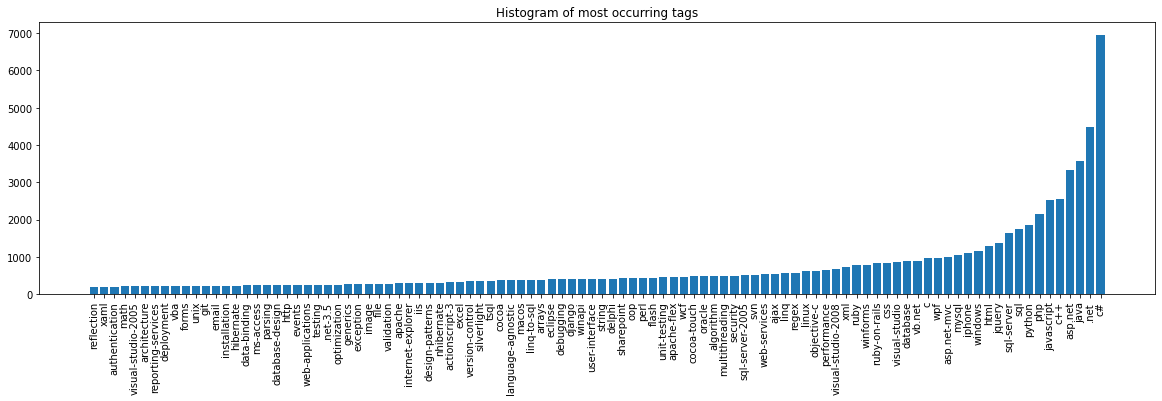

In [ ]:
plt.figure(figsize = (20, 5))
plt.bar(sliced_tag_dict.keys(),sliced_tag_dict.values())
plt.xticks(rotation = 'vertical')
plt.title('Histogram of most occurring tags')
plt.show()

[]

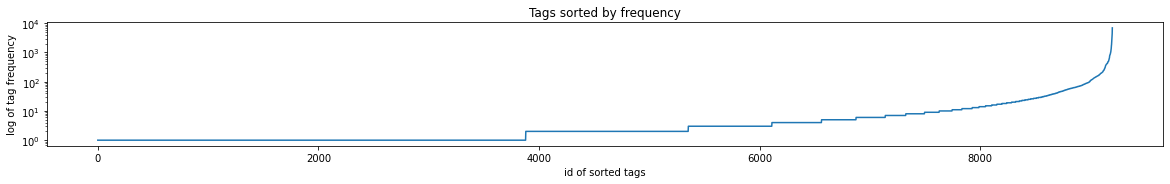

In [ ]:
x_dist = [int(val) for val in tag_dict.values()]
x_dist.sort()
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(2, 1, 1)
ax.plot(range(len(x_dist)), x_dist)
ax.set_yscale('log')
ax.set_title('Tags sorted by frequency')
ax.set_xlabel('id of sorted tags')
ax.set_ylabel('log of tag frequency')
plt.plot()

In [ ]:
# getting data of the histogram
count, bins_count = np.histogram(x_dist, bins=1000000)

# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)

In [ ]:
len(cdf)

1000000

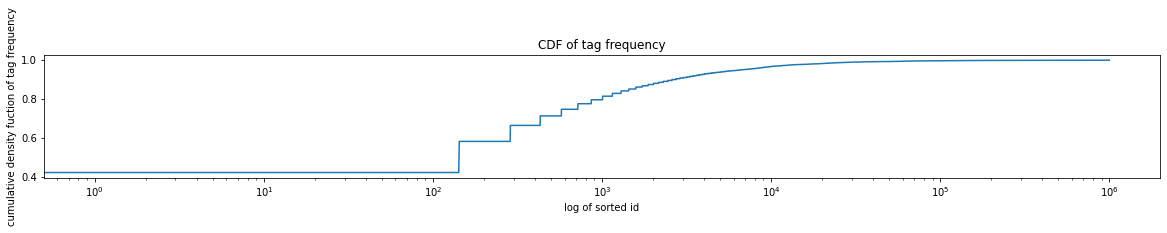

In [ ]:
fig = plt.figure(figsize = (20, 5))
ax = fig.add_subplot(2, 1, 1)
ax.plot(range(len(cdf)), cdf)
ax.set_xscale('log')
ax.set_title('CDF of tag frequency')
ax.set_xlabel('log of sorted id')
ax.set_ylabel('cumulative density fuction of tag frequency')
plt.show()

# Word cloud of texts

  0%|          | 0/50000 [00:00<?, ?it/s]

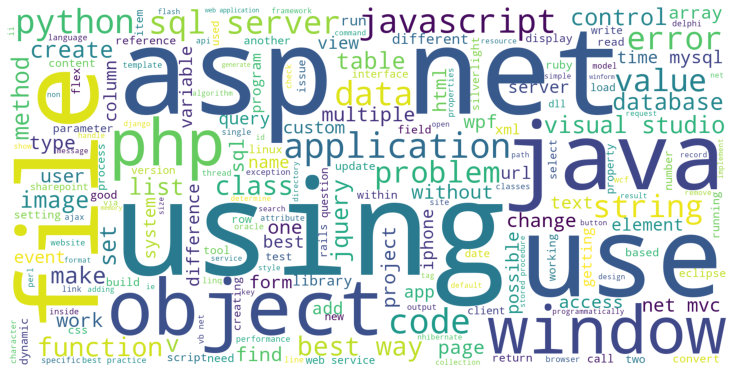

In [ ]:
# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from tqdm.auto import tqdm # loading bar
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tqdm(df.Title[~df.Title.isnull()]):
      
  # typecaste each val to string 
  val = str(val) 

  # split the value 
  tokens = val.split() 
    
  # Converts each token into lowercase 
  for i in range(len(tokens)): 
      tokens[i] = tokens[i].lower() 
    
  comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1600, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (16, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Most common words for a given tag